# ADS 509 Module 3: Group Comparison - Sarah Alqaysi 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [118]:
# Use this space for any additional import statements you need

import numpy as np
from nltk.probability import FreqDist
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.UNICODE_EMOJI : 
    for em in emoji.UNICODE_EMOJI[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here
    
    return(0)


    
def is_emoji(s):
    return(s in all_language_emojis)

def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    return(tokens)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    return(text)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [4]:
# Feel free to use the below cells as an example or read in the data in a way you prefer

data_location = "/UserData/z003cu8m/OneDrive - Siemens AG/Documents/Documents/Documents/Siemens/Computer Backup/Personal/MSADS/Text Mining/Week three/M1 Assignment Data/M1 Results/" # change to your location if it is not in the same directory as your notebook
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}

lyrics_files = {'cher_lyrics':'cher_88degrees.txt',
                'robyn_lyrics':'robyn_88days.txt'}


In [5]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [6]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [7]:
twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


In [8]:
# read in the lyrics here

# cher

lyrics_data = pd.read_csv(r"C:/Users/z003cu8m/Desktop/cher_angelsrunning.txt")

In [9]:
# robyn

lyrics_data_2 = pd.read_csv(r"C:/UserData/z003cu8m/OneDrive - Siemens AG/Documents/Documents/Documents/Siemens/Computer Backup/Personal/MSADS/Text Mining/Week three/M1 Assignment Data/M1 Results/lyrics/robyn/robyn_honey.txt",
                          sep="\t",
                           quoting=3)

## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove punctuation
* Split on whitespace
* Remove stopwords (optional)

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove punctuation other than emojis or hashtags
* Split on whitespace
* Remove stopwords

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [10]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

lyrics_data_2["tokens"] = lyrics_data_2["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data_2["num_tokens"] = lyrics_data_2["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [11]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [13]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
2447166,cher,I Always love Lady gaga since i was 5 years ol...,i always love lady gaga since i was 5 years ol...
919983,cher,😊,😊
26175,robyn,Just me (he/him). On another platform. South L...,just me hehim on another platform south london...
2930206,cher,🥰😘😍 tekla Structural Steel Detailer,🥰😘😍 tekla structural steel detailer
937354,cher,"21| BLM✊🏾✊🏾| 👻:ziggycheek Follow me, Don’t fol...",21 blm✊🏾✊🏾 👻ziggycheek follow me don’t follow ...
677134,cher,Registered Democrat- Mother- Grandmother-Disab...,registered democrat mother grandmotherdisabled...
3498206,cher,ACC/linemen ⚡️🔜,acclinemen ⚡️🔜
2182113,cher,𝘤𝘰𝘯𝘧𝘦𝘵𝘵𝘪 𝘧𝘳𝘰𝘮 𝘵𝘩𝘦 𝘱𝘳𝘦𝘴𝘦𝘯𝘵 𝘧𝘰𝘳 𝘧𝘶𝘵𝘶𝘳𝘦 𝘯𝘰𝘴𝘵𝘢𝘭𝘨𝘪𝘢...,𝘤𝘰𝘯𝘧𝘦𝘵𝘵𝘪 𝘧𝘳𝘰𝘮 𝘵𝘩𝘦 𝘱𝘳𝘦𝘴𝘦𝘯𝘵 𝘧𝘰𝘳 𝘧𝘶𝘵𝘶𝘳𝘦 𝘯𝘰𝘴𝘵𝘢𝘭𝘨𝘪𝘢...
163039,cher,Eliza Hayward writing & chatting about #Theatr...,eliza hayward writing chatting about #theatre...
1374635,cher,"🔞 30s, too tired for drama",🔞 30s too tired for drama


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: Stemming could be another area to work to improve our tokenization.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [14]:
# your code here (cher)

lyrics_data['length'] = lyrics_data['lyrics'].str.len()
lyrics_data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_tokens,36.0,24.500000,5.578018,14.0,20.75,24.5,29.25,34.0
length,36.0,24.805556,5.486708,14.0,21.50,24.5,30.00,34.0


In [15]:
# robyn

lyrics_data_2['length'] = lyrics_data_2['lyrics'].str.len()
lyrics_data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
num_tokens,65.0,31.861538,10.525085,5.0,25.0,32.0,38.0,59.0
length,65.0,33.015385,11.120775,7.0,26.0,32.0,38.0,63.0


Q: what observations do you make about these data? 

A: The num_tokens and the lengths are very close in values. Robyn's data values are higher than cher's since it has more number of tokens, except on the "min" values.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents, if we view each data source as a single document, or too many, if we view each description as a separate document. In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To get around this, we find tokens for each corpus that match the following criteria:

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.


In [68]:
# converting dataframes to dictionaries

lyrics_tokens = lyrics_data['tokens']
lyrics_tokens_list = lyrics_tokens.values.tolist()

lyrics_tokens_2 = lyrics_data_2['tokens']
lyrics_tokens_list_2 = lyrics_tokens_2.values.tolist()

twitter_tokens = twitter_data['tokens']
twitter_tokens_list = twitter_tokens.values.tolist()

#### Calculating top words ratio in cher's lyrics

In [74]:
# concatenating using join 
joined = " ".join(ele for ele in lyrics_tokens_list)
  
# mapping using Counter()
mappd = Counter(joined.split())
  
# getting total using sum 
total_val = sum(mappd.values())
  
# getting share of each word
res = {key: val / total_val for key,
       val in mappd.items()}

# printing result
print("Percentage share of each word : " + str(res))

Percentage share of each word : {'angels': 0.0106951871657754, 'running': 0.016042780748663103, 'well': 0.0106951871657754, 'i': 0.058823529411764705, 'heard': 0.0053475935828877, 'enough': 0.0106951871657754, 'and': 0.0427807486631016, 'ive': 0.016042780748663103, 'seen': 0.0053475935828877, 'know': 0.026737967914438502, 'anough': 0.0053475935828877, 'to': 0.026737967914438502, 'a': 0.06417112299465241, 'good': 0.016042780748663103, 'thing': 0.0427807486631016, 'when': 0.016042780748663103, 'see': 0.016042780748663103, 'it': 0.016042780748663103, 'its': 0.026737967914438502, 'bad': 0.026737967914438502, 'let': 0.0213903743315508, 'go': 0.0213903743315508, 'weel': 0.0053475935828877, 'been': 0.0106951871657754, 'around': 0.0053475935828877, 'up': 0.016042780748663103, 'down': 0.0053475935828877, 'until': 0.0053475935828877, 'bailed': 0.0053475935828877, 'out': 0.0053475935828877, 'of': 0.0106951871657754, 'control': 0.0053475935828877, 'with': 0.0106951871657754, 'your': 0.010695187165

In [75]:
df_lyrics_cher = pd.DataFrame.from_dict(res, orient="index").reset_index()
df_lyrics_cher.columns = ['word_cher_lyrics', 'ratio_cher_lyrics']
df_lyrics_cher.sort_values(by='ratio_cher_lyrics', ascending=False).head(10)

,word_cher_lyrics,ratio_cher_lyrics
12,a,0.064171
3,i,0.058824
6,and,0.042781
14,thing,0.042781
11,to,0.026738
19,bad,0.026738
18,its,0.026738
9,know,0.026738
21,go,0.021390
20,let,0.021390


#### Calculating top words ratio in robyn's lyrics

In [60]:
# concatenating using join 
joined = " ".join(ele for ele in lyrics_tokens_list_2)
  
# mapping using Counter()
mappd = Counter(joined.split())
  
# getting total using sum 
total_val = sum(mappd.values())
  
# getting share of each word
res_2 = {key: val / total_val for key,
       val in mappd.items()}

# printing result
print("Percentage share of each word : " + str(res_2))

Percentage share of each word : {'honey': 0.031180400890868598, 'no': 0.015590200445434299, 'youre': 0.015590200445434299, 'not': 0.015590200445434299, 'gonna': 0.015590200445434299, 'get': 0.042316258351893093, 'what': 0.051224944320712694, 'you': 0.0645879732739421, 'need': 0.022271714922048998, 'baby': 0.0400890868596882, 'i': 0.035634743875278395, 'have': 0.024498886414253896, 'want': 0.028953229398663696, 'come': 0.022271714922048998, 'your': 0.0378619153674833, 'but': 0.017817371937639197, 'got': 0.011135857461024499, 'every': 0.013363028953229399, 'colour': 0.004454342984409799, 'and': 0.0200445434298441, 'taste': 0.004454342984409799, 'breath': 0.004454342984409799, 'that': 0.0066815144766146995, 'whispers': 0.004454342984409799, 'name': 0.004454342984409799, 'its': 0.0066815144766146995, 'like': 0.008908685968819599, 'emeralds': 0.004454342984409799, 'on': 0.008908685968819599, 'the': 0.05790645879732739, 'pavement': 0.004454342984409799, 'at': 0.004454342984409799, 'heart': 0

In [61]:
df_lyrics_robyn = pd.DataFrame.from_dict(res_2, orient="index").reset_index()
df_lyrics_robyn.columns = ['word_robyn_lyrics', 'ratio_robyn_lyrics']
df_lyrics_robyn.sort_values(by='ratio_robyn_lyrics', ascending=False).head(10)

,word_robyn_lyrics,ratio_robyn_lyrics
7,you,0.064588
29,the,0.057906
6,what,0.051225
5,get,0.042316
9,baby,0.040089
14,your,0.037862
10,i,0.035635
0,honey,0.031180
12,want,0.028953
11,have,0.024499


#### Calculating top twitter tokens ratio

In [70]:
# concatenating using join 
joined = " ".join(ele for ele in twitter_tokens_list)
  
# mapping using Counter()
mappd = Counter(joined.split())
  
# getting total using sum 
total_val = sum(mappd.values())
  
# getting share of each word
res_3 = {key: val / total_val for key,
       val in mappd.items()}

# printing result
#print("Percentage share of each word : " + str(res)) # commented out printing the results to limit the output

In [71]:
df_twitter_data = pd.DataFrame.from_dict(res_3, orient="index").reset_index()
df_twitter_data.columns = ['word_twitter', 'ratio_twitter']
df_twitter_data.sort_values(by='ratio_twitter', ascending=False).head(10)

,word_twitter,ratio_twitter
0,nan,0.083190
30,and,0.023562
77,i,0.018293
89,a,0.017260
39,the,0.016845
83,to,0.014315
47,of,0.013567
33,my,0.011490
249,in,0.009603
78,love,0.008661


#### Combining all three corporas

In [90]:
def Merge(res, res_2, res_3):
    results = {**res, **res_2, **res_3}
    return results

all_corporas = Merge(res, res_2, res_3)
# print(all_corporas)

#### Calculating top tokens ratio among all corporas

In [91]:
# concatenating using join 
joined = " ".join(ele for ele in all_corporas)
  
# mapping using Counter()
mappd = Counter(joined.split())
  
# getting total using sum 
total_val = sum(mappd.values())
  
# getting share of each word
res_4 = {key: val / total_val for key,
       val in mappd.items()}

# printing result
#print("Percentage share of each word : " + str(res)) # commented out printing the results to limit the output

In [92]:
df_all_corporas = pd.DataFrame.from_dict(res_4, orient="index").reset_index()
df_all_corporas.columns = ['word_all_corporas', 'ratio_all_corporas']
df_all_corporas.sort_values(by='ratio_all_corporas', ascending=False).head(10)

,word_all_corporas,ratio_all_corporas
0,angels,5.973227e-07
1116087,#slayers,5.973227e-07
1116097,lovotics,5.973227e-07
1116096,rawdymontanagmailcom,5.973227e-07
1116095,bookingspecial,5.973227e-07
1116094,#pgm,5.973227e-07
1116093,plugrawdy,5.973227e-07
1116092,artistproducers,5.973227e-07
1116091,pluggangmillionaires,5.973227e-07
1116090,grupp,5.973227e-07


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: Pronouns and prepositions can easily fill out the list of top tokkens. We could maybe rule out words with 3 characters or less.

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [95]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [ ]:
# ploting the output

freq_lyrics_data_df = count_words(lyrics_data[lyrics_data['tokens']])
plt.figure()
wordcloud(freq_lyrics_data_df['freq'], max_words=50)
wordcloud(freq_lyrics_data_df['freq'], max_words=50, stopwords=freq_lyrics_data_df.head(10).index)

# ***Note: the book's output code kept on crashing my computer***

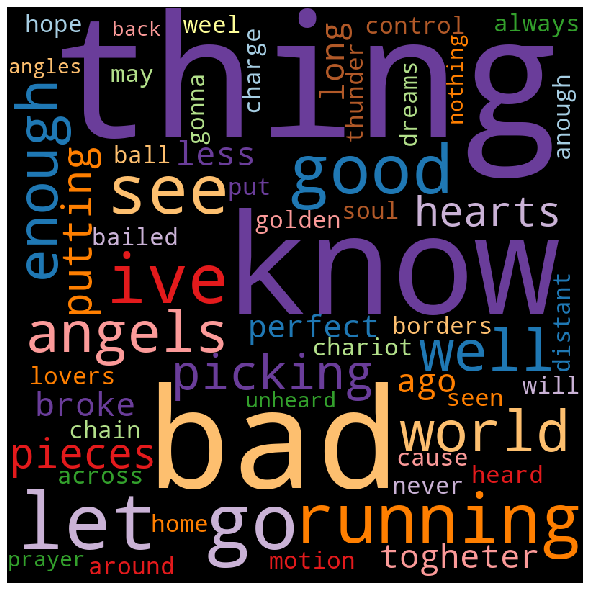

In [119]:
# modified the code to run on my computer (cher lyrics)

comment_words = ''
stopwords = set(STOPWORDS)

for val in lyrics_data['tokens']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color= "black", colormap="Paired",
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

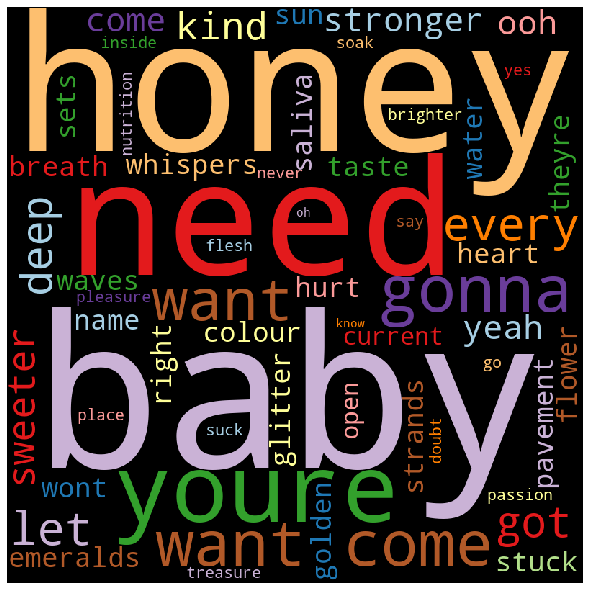

In [121]:
# robyn data

comment_words = ''
stopwords = set(STOPWORDS)

for val in lyrics_data_2['tokens']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color= "black", colormap="Paired",
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [96]:
count_words(lyrics_data, column='tokens', preprocess=lambda text: re.findall(r"\w{4,}", text), min_freq=2).head(10)

,freq
token,
thing,8
know,5
good,3
when,3
running,3
angels,2
putting,2
than,2
less,2


In [99]:
count_words(lyrics_data_2, column='tokens', preprocess=lambda text: re.findall(r"\w{4,}", text), min_freq=2).head(10)

,freq
token,
what,23
baby,18
your,17
honey,14
want,13
have,11
need,10
come,10
youre,7


In [98]:
count_words(twitter_data, column='tokens', preprocess=lambda text: re.findall(r"\w{4,}", text), min_freq=2).head(10)

,freq
token,
love,229703
life,134133
with,113461
music,105655
just,85040
follow,69015
lover,67282
have,67225
that,66875


Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: Looking at the wordcloud plot, it views the most repeated words in the corpora.